In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Otsu's Algorithm

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage.io
from skimage import data

In [3]:
def plot_image(image):
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='none')
    
mpl.rcParams['figure.figsize'] = (12, 6)

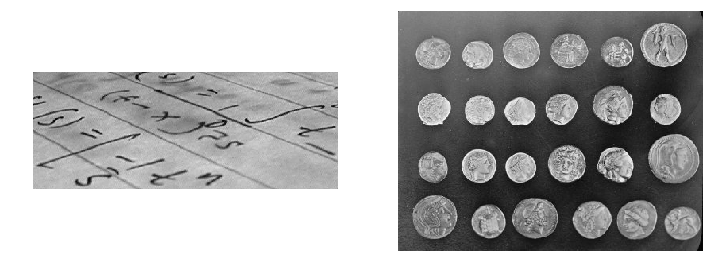

In [4]:
coins, text = data.coins(), data.text()
nike = (skimage.io.imread('images/nike.jpg', as_grey=True) * 255).astype(np.uint8)

plt.subplot(121)
plot_image(text)
plt.subplot(122)
plot_image(coins)
plt.show()

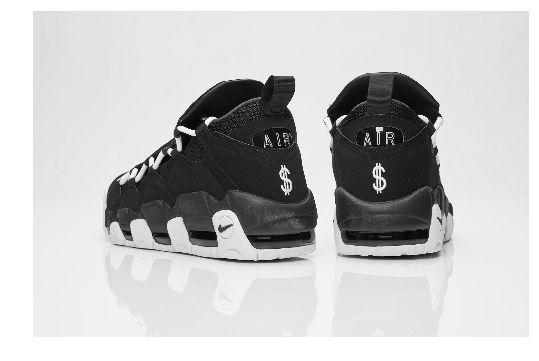

In [5]:
plot_image(nike)

In [6]:
def histogram(image):
    
    values, counts = np.unique(image, return_counts=True)
    values_to_idx = {v:idx for idx, v in enumerate(values)}
    
    return np.array([counts[values_to_idx[i]] if i in values else 0 for i in range(256)]), np.arange(256)

In [7]:
def plot_histogram(h_image):
    idx_not_zero = np.where(h_image[0] != 0)
    
    non_zero_counts = np.array(h_image[0])[idx_not_zero]
    non_zero_values = np.array(h_image[1])[idx_not_zero]
    
    plt.gca().fill_between(non_zero_values, 0, non_zero_counts)
    plt.plot(non_zero_values, non_zero_counts)

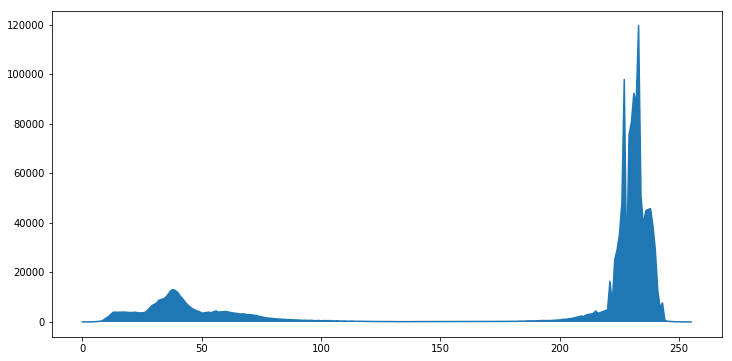

In [8]:
plot_histogram(histogram(nike))

In [9]:
def otsu_binarization(image):
    
    """
        Return the otsu threshold and the within_group_variances for each t in (1, 255)
    """
    
    def region_variance(h, v):
        
        q = np.sum(h)
        mu = np.sum(v * h) / q
        sigma = np.sum(np.square((v - mu))* h) / q
        
        return q * sigma

    
    def within_group_variance_func(t):
        
        hist_1, hist_2 = hist[:t], hist[t:]
        values_1, values_2 = values[:t], values[t:]

        v1 = region_variance(hist_1, values_1) if t > 0 else 0
        v2 = region_variance(hist_2, values_2) if t < 255 else 0

        return v1 + v2
        
     
    hist, values = histogram(image)
    hist = hist / float(np.prod(image.shape))  # Normalize
    
    within_group_variances = [within_group_variance_func(t) for t in values]
    
    return np.argmin(within_group_variances), within_group_variances

In [10]:
def otsu_binarization_faster(image):
    
    """
        Return the otsu threshold and the between_group_variances for each t in (1, 255)
    """

    
    def between_group_variance_func(t):
        
        if t == 0 or t == 255:
            return 0.
        
        hist_1, hist_2 = hist[:t], hist[t:]
        values_1, values_2 = values[:t], values[t:]
        
        q1, q2 = np.sum(hist_1), np.sum(hist_2)
        mu1, mu2 = np.sum(hist_1 * values_1) / q1, np.sum(hist_2 * values_2) / q2

        return ((mu1 - mu) ** 2) * q1 + ((mu2 - mu) ** 2) * q2
        
     
    hist, values = histogram(image)
    hist = hist / float(np.prod(image.shape))  # Normalize
    
    mu = np.sum(hist * values)
    
    between_group_variances = [between_group_variance_func(t) for t in values]
    
    return np.argmax(between_group_variances), between_group_variances

138


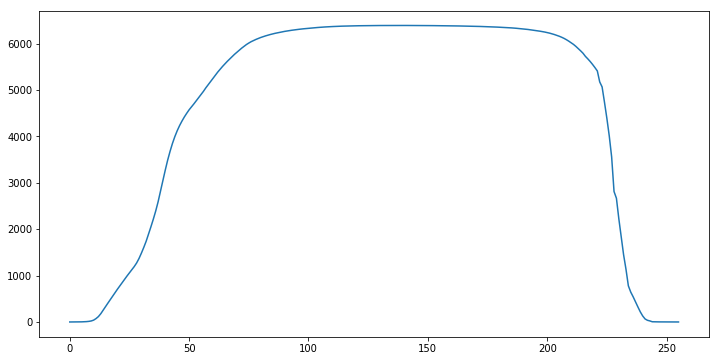

In [11]:
otsu_threshold, wgv = otsu_binarization_faster(nike)

print(otsu_threshold)

plt.plot(wgv)
plt.show()

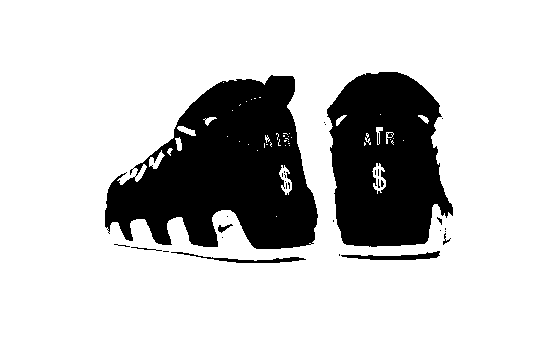

In [12]:
plot_image(nike > otsu_threshold)